# **MNIST - Digit Recognizer**
MNIST is a classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.

Our goal here is to train the machine with humongous no. of images of handwritten digits and evaluating how well our model can classify them correctly.

# **Importing Libraries**

In [26]:
import numpy as np                 # advanced math library for linear algebra
import matplotlib.pyplot as plt    # MATLAB like plotting, routines for data processing, CSV file I/O (e.g. pd.read_csv)
import random                      # For generating random number  
%matplotlib inline
#MNIST dataset is included in keras
from keras.datasets import mnist   #Importing the dataset   

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from keras.models import Sequential   

from keras.layers.core import Dense, Dropout, Activation #types of layers to be build
from keras.utils import np_utils #numpy realted tools, here used for one hot encoding

# **Loading and Splitting the Dataset**

MNIST dataset has total 70000 data is splitted in 60000 (28x28 px) dataset is used as training images and 10000(28x28 px) data is used as test images.

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #loading the dataset and splitting in training and test set
#printing the shape of the training and test set
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


**Printing some sample images from the training set**

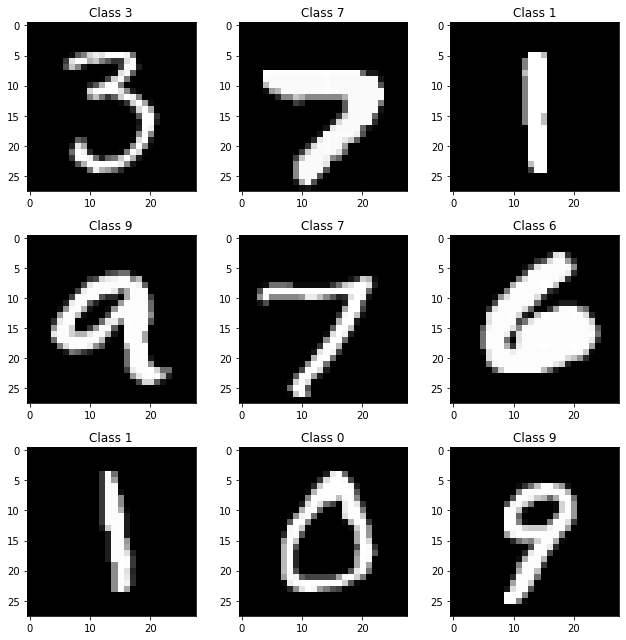

In [28]:
plt.rcParams['figure.figsize'] = (9,9) 
#Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the plt.
for i in range(9):
  plt.subplot(3,3,i+1) #subplot as the name suggests creates more than one plots in same output window
  num = random.randint(0,len(X_train)) #randint from random library is used for randomly choosing the number within the length dataset
  plt.imshow(X_train[num], cmap = 'gray', interpolation = 'none')#plotting the randomly chosen training data from the training set 
  plt.title("Class {}".format(y_train[num]))#title

plt.tight_layout() #adjusting the padding between and around subplots


In [29]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
# now print!        
matprint(X_train[num])

0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0   11   51  113  193  254  253  193  152   21    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0    0  132  252  253  252  253  252  253  252  183    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0    0   82  254  253  244  203  183  102  173  253  254  112  0  0  0  0  0  0  0  
0  0  0  0  0  0  0

# **Data (Image) Processing**

### **Flatenning**
Each images are flatenned into a vector

In [30]:
#flatenning the image 2D Array to 1D Array
X_train = X_train.reshape(60000, 784)   # reshape 60,000 28x28 matrices into 60000 784-length vector
X_test = X_test.reshape(10000, 784)     # reshape 10,000 28x28 matrices into 10000 784-length vector
#Before applying any normalization, the type of the entire dataframe must be casted from 'str' to 'float' as far as it contains only numerical values.
X_train = X_train.astype('float32') #changing the data to 32 bit float
X_test = X_test.astype('float32') #changing the data to 32 bit float



### **Normalization**
Here we will follow min-max standarization (since pixel cant take negative values so we cant us standard scalar process).
We want to normalize the input data in range 0-1 rather than 0-255.

**Data normalization** is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network.

In [31]:
X_train /= 255   #1byte = 8 bits. (Image is a 2D array) 2^8 =256, so 256 different values can be fit into 1 (0-255)
X_test /= 255   # normalize each value for each pixel 

**Printing the new shape of the dataset**

In [32]:
print("Training matrix shape", X_train.shape) #we will get 1D vectors
print("Testing matrix shape", X_test.shape)   

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


**Importance of One Hot Encoding**

It is a part of Data Preprocessing. In Deep Learning model to feed the model with data that enables it to make a classification decision, we would require to perform One Hot Encoding during data processing.

In [33]:
nb_classes = 10 # total number of unique digits is 10,i.e., 0-9

Y_train = np_utils.to_categorical(y_train, nb_classes) #it is used to convert array of labeled data(from 0 to nb_classes - 1 ) to one-hot vector. 
Y_test = np_utils.to_categorical(y_test, nb_classes)

 **Model Type: Sequential**

There are three ways to create Keras models:
Sequential Model, Functional API, Model Subclassing 

The **Sequential Model** in Keras allows us to create models layer-by-layer for most problems. It is limited to single-input, single-output stacks of layers.

The Sequential model API is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it.

In [34]:
# The Sequential model is a linear stack of layers
model = Sequential()

# **The First Hidden Layer**

In [35]:
# The first hidden layer is a set of 512 nodes (artifical neurons), [2^9=512, no. of neurons are generally choosen in 2^x form]
# Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer
model.add(Dense(512, input_shape = (784,))) #adding layers via the .add() method
#input_shape must be mentioned for only the first layer because following layers can do automatic shape inference

**RELU Activation Function**
* Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. 
* The purpose of the activation function is to introduce non-linearity into the output of a neuron.
* **Rectifier function (RELU)** – max(X,0) – take the maximum, anything positive keep that as it is but anything negative make it 0.
* It is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. 
* RELU is such an actiavtion function that preserves the property of  linear function, but is, in fact, a nonlinear function allowing complex relationships in the data to be learned.

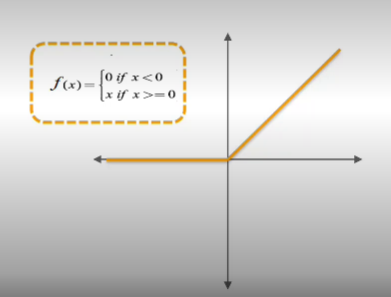





In [36]:
model.add(Activation('relu')) #we use ReLU in hidden layer to avoid vanishing gradient problem and better computation performance 

In [37]:
#the machine needs to memorize the pattern not the exact pixels, to do this we do dropouts
model.add(Dropout(0.2)) #to prevent the net from overfitting a dropout layer ignores a set of neurons (randomly) 
#turning off 20% of the neuron chosen randomly
#mainly dropout is applied after the non-linear activation function
#normal droput range is 0.1 to 0.5 - above 0.5 it is not advisable as it will hamper the learning

# **The Second Hidden Layer**

In [38]:
# Adding Second layer
model.add(Dense(512)) #here the input_shape is not required because this layers can do automatic shape inference
#instead of each of 512 node receiving 784 input, the model is recieving 512 inputs from the output of 512 node layer
model.add(Activation('relu'))#we use ReLU in hidden layer to avoid vanishing gradient problem and better computation performance 
model.add(Dropout(0.2)) #to prevent the net from overfitting a dropout layer ignores a set of neurons randomly

# **The Final Output Layer**
* This is the final hidden layer and should have as many neurons as there are outputs to the classification problem. 
* As this is a multi-class classification, Multiple neurons, one for each class is used. Here total 10 class are to be classified so no, of neurons taken 10


In [39]:
model.add(Dense(10))

**Softmax Activation Function**
* The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution. 
* softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.
* The softmax activation function transforms the raw outputs of the neural network into a vector of probabilities, essentially a probability distribution over the input classes.


In [40]:
model.add(Activation('softmax'))

# **Summarize Model**
 Keras provides a way to summarize a model. The summary is textual and includes information about:

      * The layers and their order in the model.
      * The output shape of each layer.
      * The number of parameters (weights) in each layer.
      * The total number of parameters (weights) in the model.






In [41]:
# Summary of the model

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

### **Trainable params** - .
Trainable Parameters in general are weights that are learnt during training. They are weight matrices that contribute to model’s predictive power, changed during back-propagation process. 
### **Non-trainable params** -
Non-trainable parameters is the number of weights that are not updated during training with backpropagation.
There are mainly two types of non-trainable weights:

* The ones that you have chosen to keep constant when training. This means that keras won't update these weights during training at all.
* The ones that work like statistics in BatchNormalization layers. They're updated with mean and variance, but they're not "trained with backpropagation".

Here, weights of all the parameters are  updated during training with backpropagation. 

# **Compiling The Model**


### **The loss function**

* It is a critical part of model training: it quantifies how well a model is performing a task by calculating a single number, the loss, from the model output and the desired target.


* **Categorical crossentropy** is a loss function that is used in multi-class classification tasks. 

* These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one.
* The cross entropy is a measure of how different is the predicted distribution from the target distribution.

### **Optimizer function** -
 * The optimizer helps to determine how quickly the model learns through gradient descent
 * The rate at which descends the gradient is called learning rate.
 * **Adam optimization** is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
 
###**Metric**
 * Calculates how often predictions equal labels.

* This metric creates two local variables, total and count that are used to compute the frequency with which y_pred matches y_true. This frequency is ultimately returned as binary accuracy.


In [42]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',
              metrics = ['accuracy'])


# **Training the Model**
* We train the model by calling fit method.

* During training machine takes in input and weights are decided by computer randomly.

* Then it calculates the difference between the actual output and desired output, that we called the loss function. The optimizer function directs the machine how the weights should be adjusted.

* The fit method refers this cycle of calcualte --> compare --> adjust.

  * Input ---> X_train
  * Output --->  Y_train
  * Number of times cycle should run ---> epochs,
  * Controlling the amount of o/p to be produced ---> verbose

In [43]:
model.fit(X_train, Y_train,
          batch_size=128, epochs = 10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2490 - accuracy: 0.9241
Epoch 2/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0997 - accuracy: 0.9694
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0727 - accuracy: 0.9763
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0551 - accuracy: 0.9826
Epoch 5/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0466 - accuracy: 0.9846
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0376 - accuracy: 0.9880
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0336 - accuracy: 0.9888
Epoch 8/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0311 - accuracy: 0.9898
Epoch 9/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0255 - accuracy: 0.9912
Epoch 10/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0248 - accura

# **Evaluation of the Model**
Evaluation is a process during development of the model to check whether the model is best fit for the given problem and corresponding data. 

In [44]:
score=model.evaluate(X_test,Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0752 - accuracy: 0.9802
Test score: 0.07523590326309204
Test accuracy: 0.9801999926567078


### **Test Score/Loss Score**
It is the sum of errors made for each example in training or validation sets. Loss value implies how poorly or well a model behaves after each iteration of optimization.
### **Test Accuracy**
The accuracy of a model is usually determined after the model parameters and is calculated in the form of a percentage. It is the measure of how accurate your model's prediction is compared to the true data.



# **Predicting Test Set Data**

In [45]:
predicted_x = model.predict(X_test) #predicting the test set data
predicted_classes = np.argmax(predicted_x, axis = 1) 
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 3ms/step


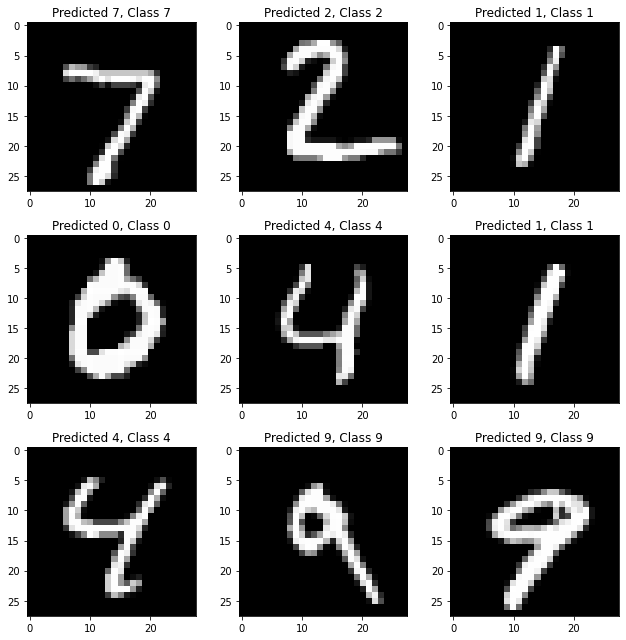

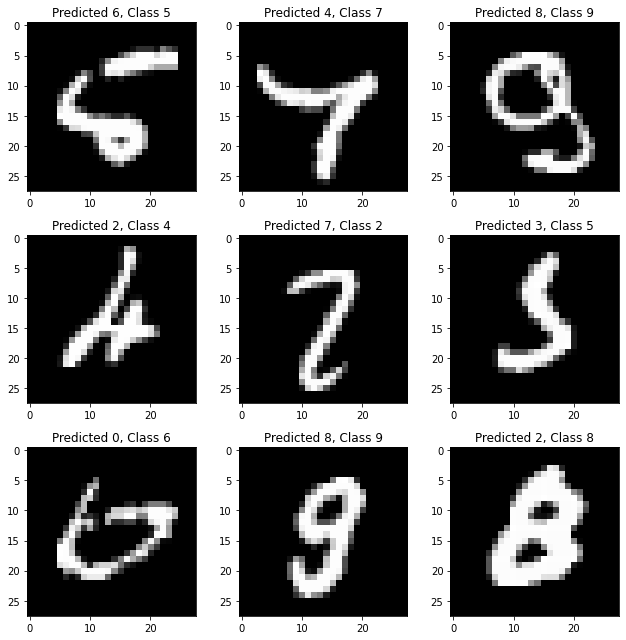

In [46]:
plt.figure() #plotting the actual class and image and the corresponding predicted class
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

# **Experimenting with Number of Batch Size**
To determine the optimum batch size, it is recommended trying smaller batch sizes first (32 or 64), also keeping in mind that small batch sizes require small learning rates. The number of batch sizes should be a power of 2 to take full advantage of the GPUs processing.

## **Decreasing the Batch Size**

In [47]:
model.fit(X_train, Y_train,
          batch_size=32, epochs = 10,
          verbose=1)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0765 - accuracy: 0.9774
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0510 - accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0462 - accuracy: 0.9855
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0404 - accuracy: 0.9875
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0392 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0403 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0345 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0350 - accuracy: 0.9897
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0340 - accuracy: 0.9898
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - l

In [48]:
score=model.evaluate(X_test,Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0939 - accuracy: 0.9807
Test score: 0.0938723012804985
Test accuracy: 0.9807000160217285


**Observations**
* we take 32 batch size for optimal results.
* accuracy improved as small data we are giving in batches


## **Increasing the Batch Size**


In [49]:
model.fit(X_train, Y_train,
          batch_size=10000, epochs = 10,
          verbose=1)

Epoch 1/10
6/6 [==============================] - 4s 593ms/step - loss: 0.0334 - accuracy: 0.9905
Epoch 2/10
6/6 [==============================] - 4s 593ms/step - loss: 0.0287 - accuracy: 0.9916
Epoch 3/10
6/6 [==============================] - 4s 590ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 4/10
6/6 [==============================] - 4s 593ms/step - loss: 0.0200 - accuracy: 0.9938
Epoch 5/10
6/6 [==============================] - 4s 591ms/step - loss: 0.0180 - accuracy: 0.9943
Epoch 6/10
6/6 [==============================] - 4s 596ms/step - loss: 0.0169 - accuracy: 0.9946
Epoch 7/10
6/6 [==============================] - 4s 595ms/step - loss: 0.0154 - accuracy: 0.9951
Epoch 8/10
6/6 [==============================] - 4s 592ms/step - loss: 0.0149 - accuracy: 0.9952
Epoch 9/10
6/6 [==============================] - 4s 594ms/step - loss: 0.0124 - accuracy: 0.9958
Epoch 10/10
6/6 [==============================] - 4s 591ms/step - loss: 0.0133 - accuracy: 0.9955


In [50]:
score=model.evaluate(X_test,Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0731 - accuracy: 0.9851
Test score: 0.07314606755971909
Test accuracy: 0.9850999712944031


**Observations**
*  Larger batch sizes make larger gradient steps than smaller batch sizes for the same number of samples.
* Bigger the batch size, lesser is the noise in the gradients and so better is the gradient estimate. This allows the model to take a better step towards a minima.
* By using bigger batch sizes , we speed up training, as it is equivalent to taking a few big steps, instead of taking many little steps. 
* Here the accuracy has incresed by negligible amt. after increasing the batch size.

Batch Size is a hyper parameter and we have to adjust according to the dataset and check it again and again  (by increasing and decreasing) to get the optimal result.